In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Importamos los datos de excel

In [3]:
df = pd.read_excel("regression_data.xls")
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

Empezamos mirando la información de las diferentes columnas y su tipo.

In [4]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

Empezamos a limpiar las columnas buscando los valores nulos y valores repetidos ya que puede ser que una casa haya sido vendida más de una vez.

In [5]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [7]:
(df['id'].value_counts()>1).sum()

176

Como podemos ver hay 176 propiedades que han sido vendidas más de una vez. Pero como son valores válidos no nos interesa borrarlos ya que nos pueden ser de utilidad para la predicción.

In [8]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Podemos observar que hay una propiedad con 33 habitaciones cosa que por el precio y espacio vemos que es un valor erroneo, procedemos a la eliminicación de dicha fila (de dicha propiedad)para obtener un modelo mas preciso.

In [9]:
df[df['bedrooms'] == 33]

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  2402100895 2014-06-25        33       1.75         1620      6000   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
15856     1.0           0     0          5  ...        1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15   price  
15856        4700  640000  

[1 rows x 21 columns]

In [10]:
df = df[df['bedrooms']!=33]

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [12]:
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21596 rows x 21 columns]

Procedemos a redondear todos los números a dos decimales para trabajr con la misma longitud de datos en todas las variables

In [13]:
df.describe().apply(lambda x: round(x,2))

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count  2.159600e+04  21596.00   21596.00     21596.00    21596.00  21596.00   
mean   4.580575e+09      3.37       2.12      2080.34    15099.83      1.49   
std    2.876764e+09      0.90       0.77       918.12    41413.55      0.54   
min    1.000102e+06      1.00       0.50       370.00      520.00      1.00   
25%    2.123049e+09      3.00       1.75      1430.00     5040.00      1.00   
50%    3.904930e+09      3.00       2.25      1910.00     7619.00      1.50   
75%    7.308950e+09      4.00       2.50      2550.00    10685.50      2.00   
max    9.900000e+09     11.00       8.00     13540.00  1651359.00      3.50   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    21596.00  21596.00   21596.00  21596.00    21596.00       21596.00   
mean         0.01      0.23       3.41      7.66     1788.63         291.71   
std          0.09      0.77       0.65      1.17      827.76         442.67   
min          0.00      0.00       1.00      3.00      370.00           0.00   
25%          0.00      0.00       3.00      7.00     1190.00           0.00   
50%          0.00      0.00       3.00      7.00     1560.00           0.00   
75%          0.00      0.00       4.00      8.00     2210.00         560.00   
max          1.00      4.00       5.00     13.00     9410.00        4820.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21596.00      21596.00  21596.00  21596.00  21596.00       21596.00   
mean    1971.00         84.47  98077.95     47.56   -122.21        1986.65   
std       29.38        401.83     53.51      0.14      0.14         685.23   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15       price  
count    21596.00    21596.00  
mean     12758.66   540291.96  
std      27275.02   367376.02  
min        651.00    78000.00  
25%       5100.00   322000.00  
50%       7620.00   450000.00  
75%      10083.00   645000.00  
max     871200.00  7700000.00

Procedemos a la creación del model regressivo para validar los datos

C:\Users\qs779nr\AppData\Local\Temp\ipykernel_31036\557612855.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


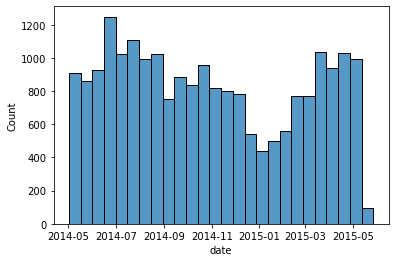

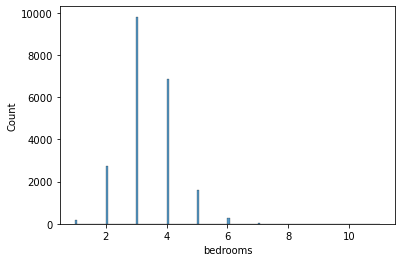

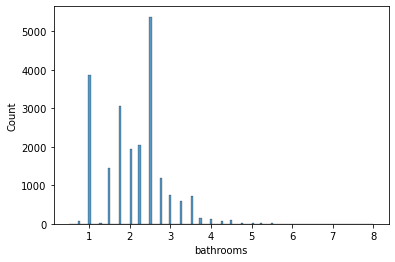

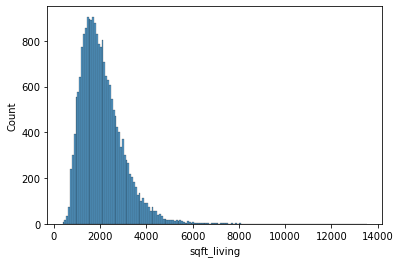

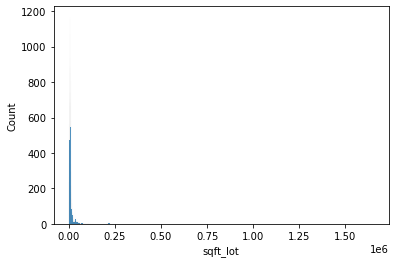

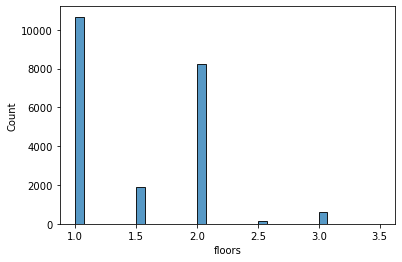

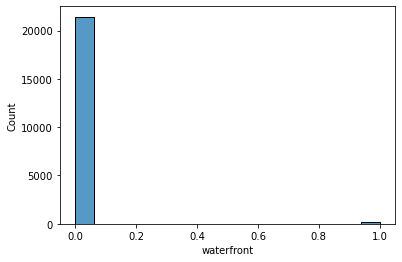

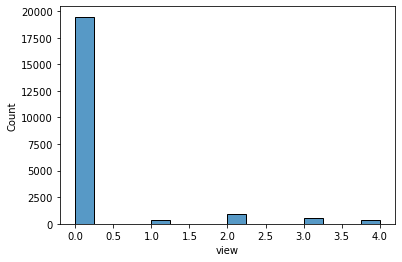

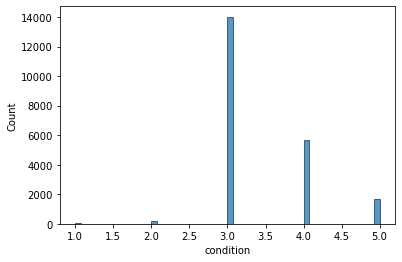

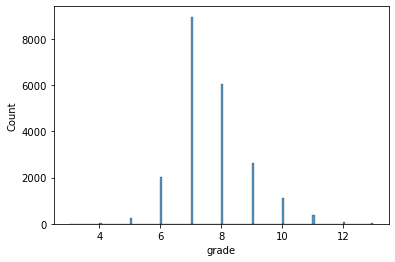

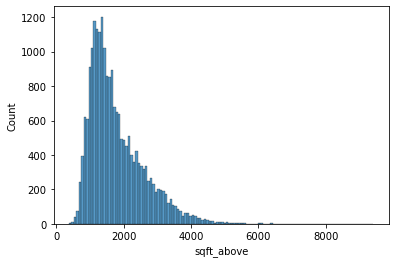

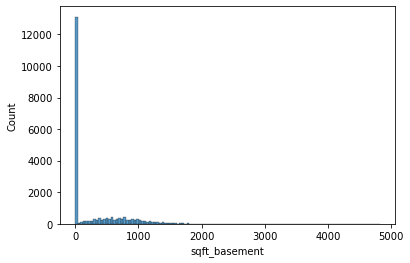

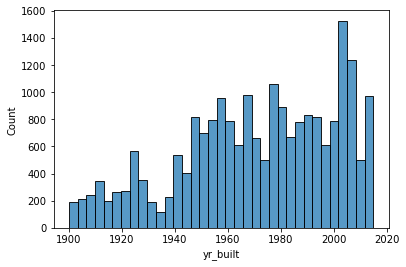

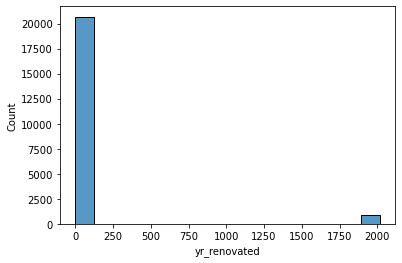

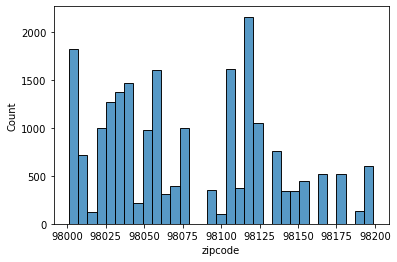

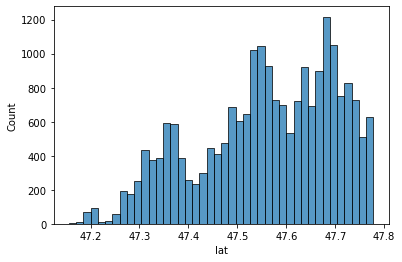

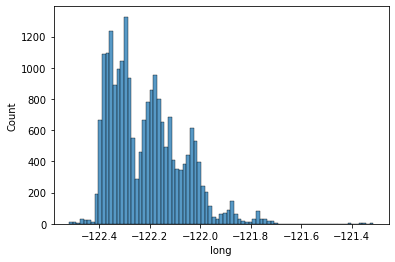

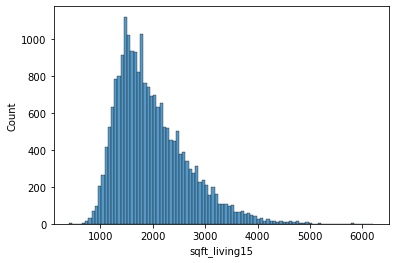

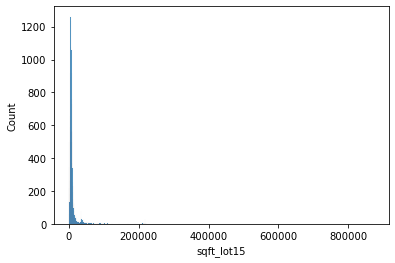

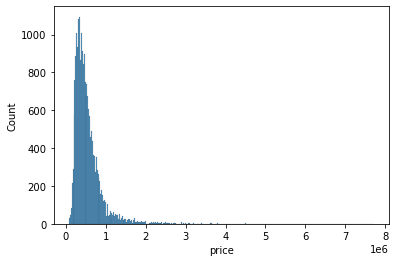

<Figure size 432x288 with 0 Axes>

In [14]:
#Primero queremos observar la distribución de datos de cada una de las columnas 
for col in df.columns[1:]:
    sns.histplot(df[col])
    plt.figure()

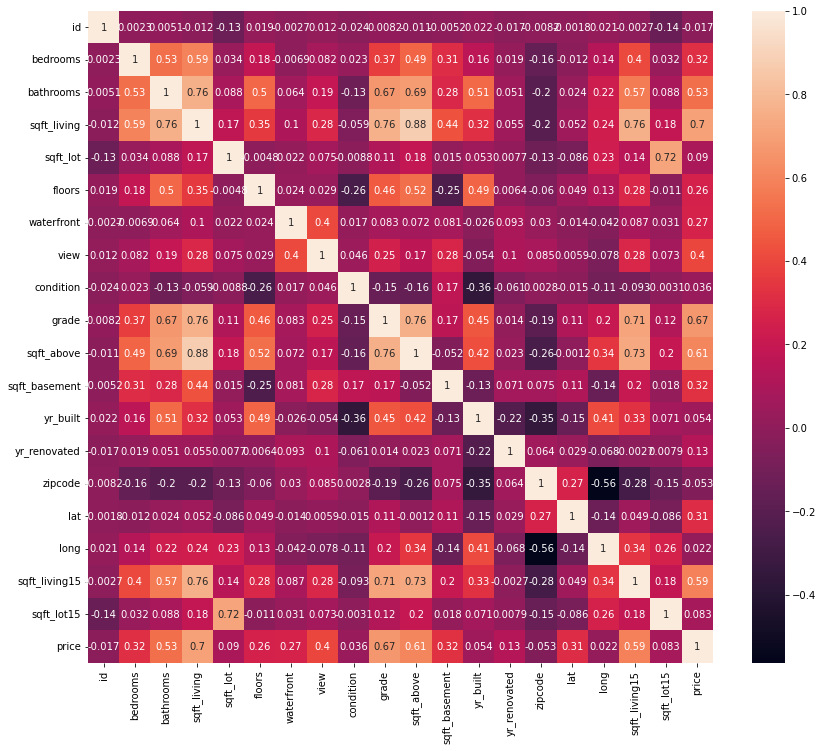

In [15]:
#Procedemos a mirar la correlación de todos los datos obtenidos
df.corr()
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

Observamos en la matriz de correlación que los datos son mayormente negativos, significando que más relacionadas negativamente están las variables. Si nos fijamos en la variable precio que consideramos que es una de las mas importantes a la hora de definir bien el modelo, podemos observar que la correlación entre las variables es positiva

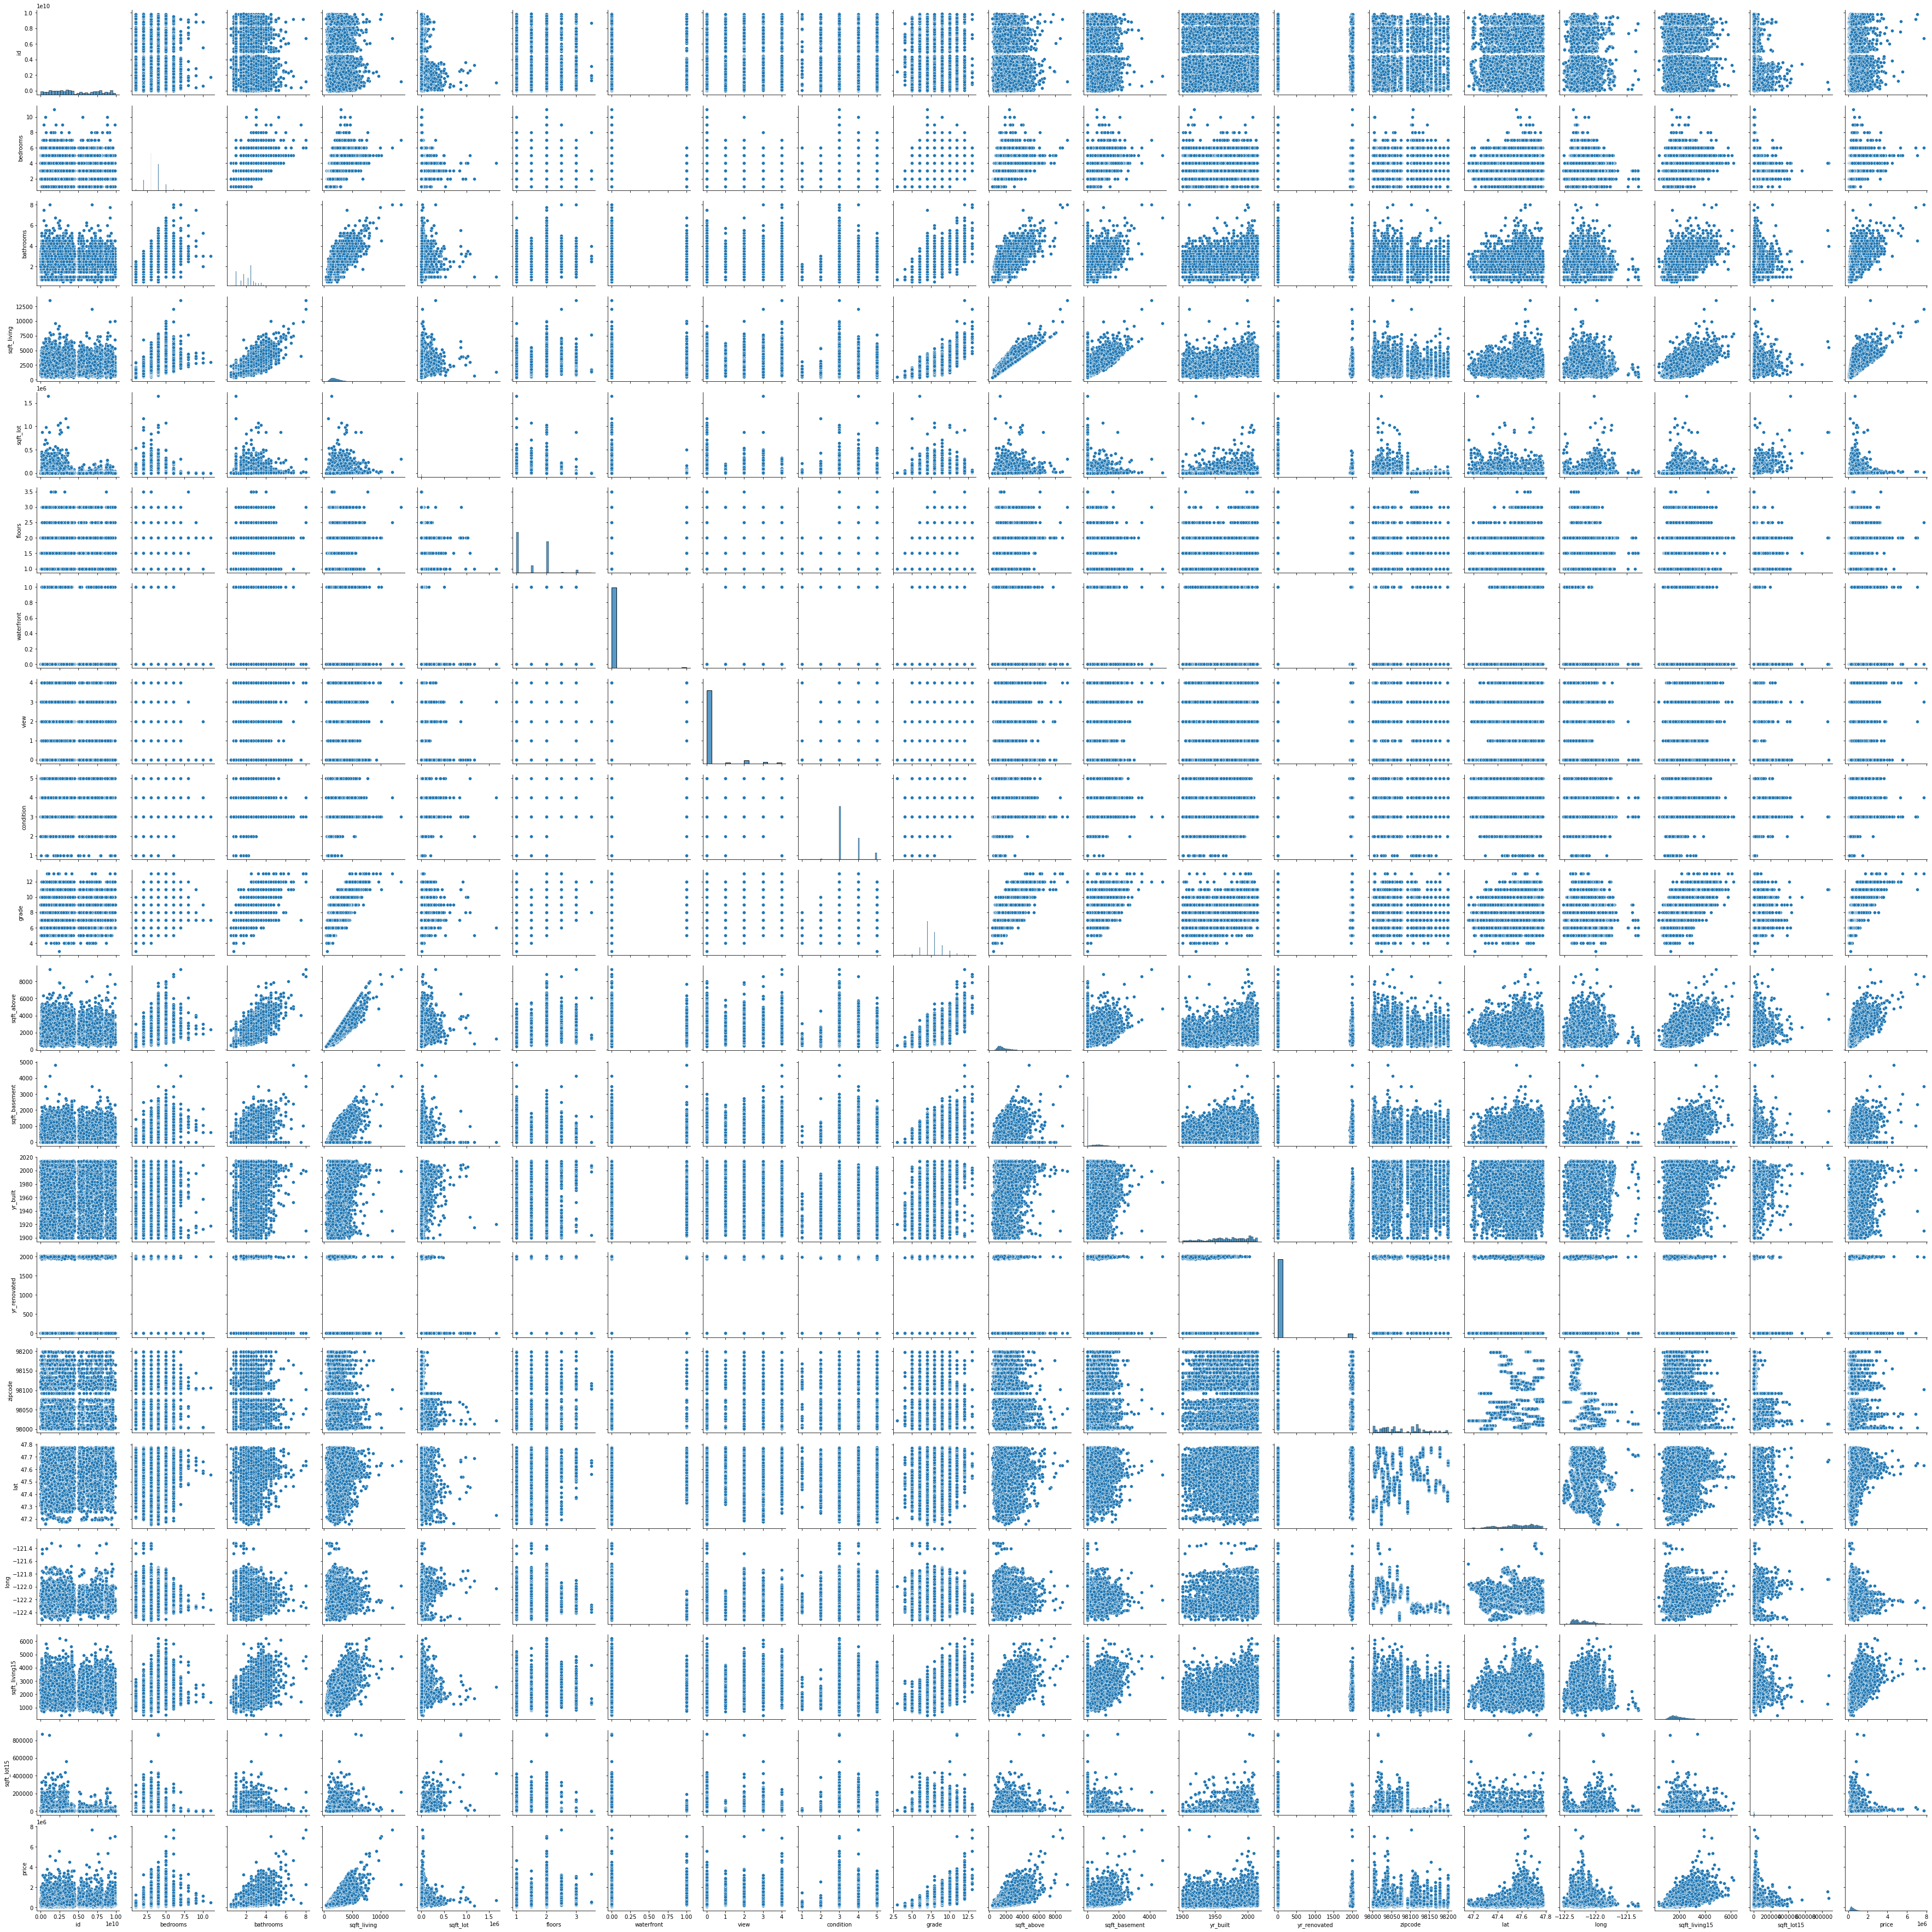

In [16]:
sns.pairplot(df)

In [39]:
# sklearn's LR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

lm = LinearRegression() # start the model object
X = df.drop(columns=['price'])
Y = df['price']

Necesitamos convertir la fecha en tipo float para poder utilizar la regresión lineal.

In [40]:
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
df['date'] = df['date_delta'].values

UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [41]:
df.dtypes

id                 int64
date             float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
date_delta       float64
dtype: object

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
model = lm.fit(X_train,Y_train)
Y_pred= lm.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred,squared=False)
mse = mean_squared_error(Y_test, Y_pred, squared=True)
r2 = r2_score(Y_test, Y_pred)
# r2 is the overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, is to see if the errors are big, the values returnes are in the unit of the target


In [43]:
print("R2:", r2)
print("MSE:", mse)
print("RMSE:",rmse)


R2: 0.6971482497565151
MSE: 42358685802.26732
RMSE: 205812.25862972136
